In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import RobustScaler, LabelEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline  
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve


In [2]:
df = pd.read_csv(r"C:\Users\DHONI HANIF\OneDrive\Documents\AI_Collection_and_Loss_Reverse_Forecast\data\AI_Collection_and_Loss_Reverse_Forecast.csv")
df.sample(5)

,Unnamed: 0,debtor_name,debtor_nik,debtor_address,debtor_number,debtor_company,debtor_gender,debtor_education_level,employment_type,number_of_dependents,...,arrears12,aging,debtor_zip,debtor_rt,debtor_rw,debtor_birth_place,debtor_age,debtor_occupation,debtor_marital_status,tenor
3742,3742,H. Sidiq Napitupulu,5322287052358457,"Jalan Laswi No. 61\nTual, SB 65174",+62 (744) 157-1959,UD Nashiruddin,perempuan,S1,Full-time,4,...,0,Kurang lancar,65174,11,7,"Maluku Utara, 01-06-1994",29,Pengusaha,Menikah,3
2524,2524,Jayadi Pudjiastuti,8476202933587911,"Jl. Raya Setiabudhi No. 934\nProbolinggo, Sula...",+62 (0988) 392-7624,Perum Simbolon Tbk,laki-laki,D3,Retired,5,...,0,DPK,19267,8,9,"Sulawesi Barat, 11-06-1993",30,Pengusaha,Belum menikah,12
3938,3938,Balidin Oktaviani,3670691097224139,"Jl. BKR No. 911\nPadang Sidempuan, GO 61916",+62 (075) 887-5101,PT Wasita (Persero) Tbk,perempuan,SMA,Part-time,4,...,0,Diragukan,61916,18,7,"Bengkulu, 22-06-1967",56,Profesional,Cerai hidup,2
3925,3925,"Puti Elisa Wacana, M.TI.",5748919265501695,Gang Cihampelas No. 60\nKota Administrasi Jaka...,+62 (0240) 878 4327,UD Usada,laki-laki,D1,Full-time,0,...,0,DPK,22140,17,7,"Sulawesi Tenggara, 09-11-1994",29,Pegawai Swasta,Cerai mati,25
1168,1168,Lulut Salahudin,9667567204329496,"Gg. Cikutra Barat No. 13\nDenpasar, MU 87048",+62 (787) 502-3999,PT Kusumo Astuti,perempuan,D3,Retired,4,...,1,Kurang lancar,87048,17,2,"Jawa Barat, 12-10-1985",38,Pengusaha,Menikah,12


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 53 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              5000 non-null   int64  
 1   debtor_name             5000 non-null   object 
 2   debtor_nik              5000 non-null   int64  
 3   debtor_address          5000 non-null   object 
 4   debtor_number           5000 non-null   object 
 5   debtor_company          5000 non-null   object 
 6   debtor_gender           5000 non-null   object 
 7   debtor_education_level  5000 non-null   object 
 8   employment_type         5000 non-null   object 
 9   number_of_dependents    5000 non-null   int64  
 10  net_income              5000 non-null   float64
 11  payment_date            5000 non-null   object 
 12  loan_amount             5000 non-null   float64
 13  amount_of_late          5000 non-null   int64  
 14  late_payment_amount     5000 non-null   

In [4]:
X = df.drop("credit_risk", axis=1)
y = df["credit_risk"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)


In [5]:
model = joblib.load("credit_risk.joblib")
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['net_income', 'loan_amount',
                                                   'amount_of_late',
                                                   'late_payment_amount',
                                                   'credit_score',
                                                   'arrears_amounts',
                                                   'loss_reverse']),
                                                 ('drop', 'drop',
                                                  ['Unnamed: 0', 'debtor_name',
                                                   'debtor_nik',
                                                   'debtor_address',
                                                   '...
                                                   'debtor_gender',
                                                   'employment_type',
                                                   'payment_date',
                                                   'number_of_dependents',
                                                   'aset', 'bil1_late1',
                                                   'bill_late2', 'bill_late3',
                                                   'bill_late4', 'bill_late5',
                                                   'bill_late6', 'bill_late7',
                                                   'bill_late8', 'bill_late9',
                                                   'bill_late10', 'bill_late11',
                                                   'bill_late12', 'arrears1',
                                                   'arrears2', 'arrears3',
                                                   'arrears4', 'arrears5',
                                                   'arrears6', 'arrears7', ...])])),
                ('regressor', BaggingClassifier())])

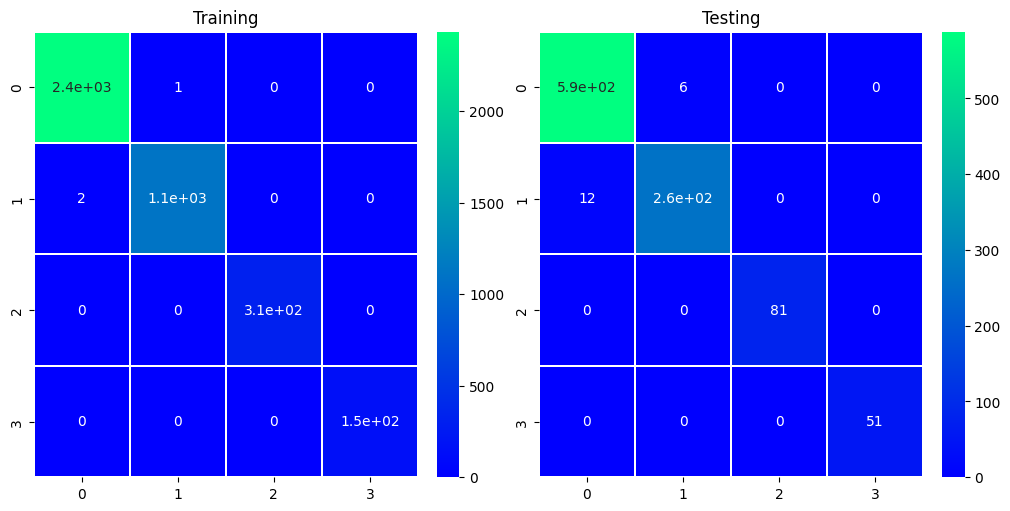

In [6]:
y_pred = model.predict(X_test)
fig, ax = plt.subplots(1, 2, figsize=(10, 5), layout="constrained")
sns.heatmap(confusion_matrix(y_train, model.predict(X_train)), annot=True, linecolor="white", linewidths=0.2, cmap="winter", ax=ax[0])
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, linecolor="white", linewidths=0.2, cmap="winter", ax=ax[1])

ax[0].set_title("Training")
ax[1].set_title("Testing")
plt.show()

In [7]:
print(classification_report(y_test, y_pred))

                                     precision    recall  f1-score   support

      Tertagih dengan resiko rendah       0.98      0.99      0.98       594
      Tertagih dengan resiko tinggi       0.98      0.96      0.97       274
Tidak tertagih dengan resiko rendah       1.00      1.00      1.00        81
Tidak tertagih dengan resiko tinggi       1.00      1.00      1.00        51

                           accuracy                           0.98      1000
                          macro avg       0.99      0.99      0.99      1000
                       weighted avg       0.98      0.98      0.98      1000



In [8]:
joblib.dump(model, "credit_risk.joblib")

['credit_risk.joblib']